# Predicting Heart Disease 

Group Number: 65 | Group Members: Claire Rollins, Edward Li, Erika Kuwabara, Jeff Lu

In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(ggplot2)
require(reshape2)
options(repr.matrix.max.rows = 6)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

## Introduction 

Cardiovascular disease is the leading cause of death worldwide, with an estimated 17.9 million people dying of cardiovascular diseases in 2019. There are many factors that contribute to the cause of these diseases, including age, sex, blood pressure and more (World Health Organization, 2021). As heart disease affects so many people worldwide, it would be useful to have more tools to diagnose it. We will be exploring this using a KNN classification model and a Heart Disease dataset to predict whether or not someone has heart disease.   


We will be working with data collected in 1988 by researchers in Hungary, California, Cleveland and Switzerland. They collected data on 76 attributes they believe contribute to heart disease. We will only be using 14 of them in our data. This data contains 920 rows and 15 columns. 


### Columns:

|Id|Key|Description|
|-|-|-|
|1|age|in years|
|2|sex|male or female|
|3|cp|chest pain type (typical angina, atypical angina, non-anginal pain, or asymptomatic)|
|4|trestbps|resting blood pressure in mmHg|
|5|chol|serum cholesterol in mg/dl|
|6|fbs|fasting blood sugar > 120 mg/dl, true or false|
|7|restecg|resting electrocardiographic results (normal, ST-T wave abnormality, left ventricular hypertrophy)|
|8|thalach|maximum heart rate|
|9|exang|exercise induced angina, true or false|
|10|oldpeak|ST depression induced by exercise|
|11|slope|slope of peak exercise ST segment (upsloping, flat, downsloping)|
|12|ca|number of major vessels coloured by fluoroscopy|
|13|thal|thalassemia, a blood disorder (normal, fixed defect, reversible defect)|
|14|num|heart condition (true or false)|
|15|location|Cleveland, Hungary, Switzerland, California|

Our goal is to answer the question: Can you predict if a patient has heart disease from these collected attributes and if so, compare the accuracy of our model to human doctors to determine if it is reliable for medical use? 

## Preliminary exploratory data analysis

First, we load in the datasets from the web for each of the four locations.

In [25]:
# Load In Each Dataset
cleveland_data <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", header = FALSE, na.strings = "?")
cleveland_data <- mutate(cleveland_data, location = "Cleveland")
cat("\n\nTable 1.1: Unprocessed Heart Data from Cleveland")
cleveland_data

hungarian_data <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.hungarian.data", header = FALSE, na.strings = "?")
hungarian_data <- mutate(hungarian_data, location = "Hungary")
cat("\n\nTable 1.2: Unprocessed Heart Data from Hungary")
hungarian_data

switzerland_data <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.switzerland.data", header = FALSE, na.strings = "?")
switzerland_data <- mutate(switzerland_data, location = "Switzerland")
cat("\n\nTable 1.3: Unprocessed Heart Data from Switzerland")
switzerland_data

va_data <- read.csv("http://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.va.data", header = FALSE, na.strings = "?")
va_data <- mutate(va_data, location = "California")
cat("\n\nTable 1.4: Unprocessed Heart Data from California")
va_data



Table 1.1: Unprocessed Heart Data from Cleveland

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1,7,3,Cleveland
57,0,2,130,236,0,2,174,0,0.0,2,1,3,1,Cleveland
38,1,3,138,175,0,0,173,0,0.0,1,NA,3,0,Cleveland




Table 1.2: Unprocessed Heart Data from Hungary

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
28,1,2,130,132,0,2,185,0,0,NA,NA,NA,0,Hungary
29,1,2,120,243,0,0,160,0,0,NA,NA,NA,0,Hungary
29,1,2,140,NA,0,0,170,0,0,NA,NA,NA,0,Hungary
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
56,1,4,155,342,1,0,150,1,3,2,NA,NA,1,Hungary
58,0,2,180,393,0,0,110,1,1,2,NA,7,1,Hungary
65,1,4,130,275,0,1,115,1,1,2,NA,NA,1,Hungary




Table 1.3: Unprocessed Heart Data from Switzerland

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
32,1,1,95,0,NA,0,127,0,0.7,1,NA,NA,1,Switzerland
34,1,4,115,0,NA,NA,154,0,0.2,1,NA,NA,1,Switzerland
35,1,4,NA,0,NA,0,130,1,NA,NA,NA,7,3,Switzerland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
72,1,3,160,0,NA,2,114,0,1.6,2,2,NA,0,Switzerland
73,0,3,160,0,0,1,121,0,0.0,1,NA,3,1,Switzerland
74,1,2,145,0,NA,1,123,0,1.3,1,NA,NA,1,Switzerland




Table 1.4: Unprocessed Heart Data from California

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<dbl>,<int>,<int>,<int>,<int>,<chr>
63,1,4,140,260,0,1,112,1,3.0,2,NA,NA,2,California
44,1,4,130,209,0,1,127,0,0.0,NA,NA,NA,0,California
60,1,4,132,218,0,1,140,1,1.5,3,NA,NA,2,California
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2,California
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0,California
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1,California


We then merge the four datasets together so we have one dataset, which will be the one we analyze.

In [26]:
# Merge Datasets
raw_data <- rbind(cleveland_data, hungarian_data, switzerland_data, va_data)
cat("\n\nTable 1.5: Full Unprocessed Heart Data")
raw_data



Table 1.5: Full Unprocessed Heart Data

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,location
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>
63,1,1,145,233,1,2,150,0,2.3,3,0,6,0,Cleveland
67,1,4,160,286,0,2,108,1,1.5,2,3,3,2,Cleveland
67,1,4,120,229,0,2,129,1,2.6,2,2,7,1,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,1,4,122,223,1,1,100,0,0,NA,NA,6,2,California
58,1,4,NA,385,1,2,NA,NA,NA,NA,NA,NA,0,California
62,1,2,120,254,0,2,93,1,0,NA,NA,NA,1,California


We rename the columns and factor values to a human-legible form so that we can interpret them.

In [27]:
# Modify Column Names
names(raw_data) <- c("age", "sex", "cp", "trestbps", "chol", "fbs", "restecg", "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num", "location")

# Interpret columns as factors
# Mappings acquired from https://archive.ics.uci.edu/ml/datasets/Heart+Disease
heart_data <- raw_data |> mutate(
    sex = as.factor(sex),
    cp = as.factor(cp),
    fbs = as.logical(fbs),
    restecg = as.factor(restecg),
    exang = as.logical(exang),
    slope = as.factor(slope),
    ca = as.factor(ca),
    thal = as.factor(thal),
    num = as.factor(num > 0)
)

# Solution found online to convert numerial factors to string factors
# https://stackoverflow.com/questions/13613913/how-do-i-convert-certain-columns-of-a-data-frame-to-become-factors
levels(heart_data$sex)<- c("female", "male")
levels(heart_data$cp) <- c("typical angina","atypical angina", "non-anginal pain", "asymptomatic")
levels(heart_data$restecg) <- c("normal","ST-T wave abnormality","hypertrophy")
levels(heart_data$slope) <- c("upsloping","flat","downsloping")
levels(heart_data$thal) <- c("normal", "fixed defect","reversable defect")
cat("Table 2.1: Processed Heart Data")
heart_data

Table 2.1: Processed Heart Data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,location
<dbl>,<fct>,<fct>,<dbl>,<dbl>,<lgl>,<fct>,<dbl>,<lgl>,<dbl>,<fct>,<fct>,<fct>,<fct>,<chr>
63,male,typical angina,145,233,TRUE,hypertrophy,150,FALSE,2.3,downsloping,0,fixed defect,FALSE,Cleveland
67,male,asymptomatic,160,286,FALSE,hypertrophy,108,TRUE,1.5,flat,3,normal,TRUE,Cleveland
67,male,asymptomatic,120,229,FALSE,hypertrophy,129,TRUE,2.6,flat,2,reversable defect,TRUE,Cleveland
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
55,male,asymptomatic,122,223,TRUE,ST-T wave abnormality,100,FALSE,0,NA,NA,fixed defect,TRUE,California
58,male,asymptomatic,NA,385,TRUE,hypertrophy,NA,NA,NA,NA,NA,NA,FALSE,California
62,male,atypical angina,120,254,FALSE,hypertrophy,93,TRUE,0,NA,NA,NA,TRUE,California


Next, we remove all invalid data from our dataset. This includes NA values in any column as well as zeros in blood pressure and cholesterol. Since it is not possible for blood pressure and cholesterol to be zero, we remove these from our classification. On the other hand, it is possible for ST depression to be zero, so we keep those in our dataset. 

Since we are dealing with a classification problem, we also remove all non-numerical predictor variables.

In [28]:
num_uncleaned_rows <- nrow(heart_data)

num_na <- heart_data |>
    filter(is.na(age) | is.na(trestbps) | is.na(chol) | is.na(thalach) | is.na(oldpeak)) |>
    nrow()

num_zero <- heart_data |>
    filter(trestbps == 0 | chol == 0) |>
    nrow()

heart_clean <- heart_data |>
    filter(!is.na(age) & !is.na(trestbps) & !is.na(chol) & !is.na(thalach) & !is.na(oldpeak)) |>
    filter(trestbps!=0) |>
    filter(chol!=0)

num_cleaned_rows <- nrow(heart_clean)

cat("\n\nTable 3.1: Statistics of Uncleaned Data")
data.frame(
  Key = c("Number of Rows (before cleaning)", 
          "Number of NA Values", 
          "Number of (invalid) Zeros", 
          "Number of Rows (after cleaning)",
          "Number of Rows Removed"),
  Value = c(num_uncleaned_rows, num_na, num_zero, num_cleaned_rows, num_uncleaned_rows-num_cleaned_rows)
)

#Select only predictor variables
heart_num <- heart_clean |>
    select(num, age, trestbps, chol, thalach, oldpeak)

cat("\n\nTable 3.2: Processed and Cleaned Heart Data")
heart_num



Table 3.1: Statistics of Uncleaned Data

Key,Value
<chr>,<int>
Number of Rows (before cleaning),920
Number of NA Values,93
Number of (invalid) Zeros,172
Number of Rows (after cleaning),672
Number of Rows Removed,248




Table 3.2: Processed and Cleaned Heart Data

num,age,trestbps,chol,thalach,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,63,145,233,150,2.3
TRUE,67,160,286,108,1.5
TRUE,67,120,229,129,2.6
⋮,⋮,⋮,⋮,⋮,⋮
TRUE,54,127,333,154,0
TRUE,55,122,223,100,0
TRUE,62,120,254,93,0


After filtering, we see that there are 93 rows with NA values and 172 rows with zeros in the blood pressure and cholesterol. Before cleaning, we had 920 rows, and after cleaning, we have 672 rows. In total, we removed 248 rows.

We then create the training and testing sets with a 75/25 split.

In [29]:
set.seed(1000)
#Split into 75% training and 25% testing
heart_split <- initial_split(heart_num, prop=0.75, strata = num)
heart_training <- training(heart_split)
heart_testing <- testing(heart_split) 
cat("Table 4.1: Training Data")
heart_training

Table 4.1: Training Data

,num,age,trestbps,chol,thalach,oldpeak
,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
4,FALSE,37,130,250,187,3.5
5,FALSE,41,130,204,172,1.4
6,FALSE,56,120,236,178,0.8
⋮,⋮,⋮,⋮,⋮,⋮,⋮
670,TRUE,54,127,333,154,0
671,TRUE,55,122,223,100,0
672,TRUE,62,120,254,93,0


Below, we a target class distribution table to see how well the data was split. We note that the two classes are more or less balanced, 238 individuals with heart disease versus 265 without. We then find the average values for each variable for each class, and see that heart disease patients appear to be older, have lower cholesterol, higher maximum heart rate, and higher ST depression. 

In [30]:
# Distribution of target class
class_dist <- heart_training |>
    group_by(num) |>
    summarize(n=n(), percent = (n() / nrow(heart_training))*100)
cat("\n\nTable 5.1: Class Distribution in Training Data")
class_dist

# Average values table of each predictor
var_means <- heart_training |>
    group_by(num)|>
    summarize(across(age:oldpeak, mean, na.rm=TRUE))
cat("\n\nTable 5.2: Average values of Each Predictor in Training Data")
var_means



Table 5.1: Class Distribution in Training Data

num,n,percent
<fct>,<int>,<dbl>
FALSE,265,52.6839
TRUE,238,47.3161




Table 5.2: Average values of Each Predictor in Training Data

num,age,trestbps,chol,thalach,oldpeak
<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
FALSE,50.21132,129.7887,242.2566,150.3774,0.3977358
TRUE,55.42017,137.1387,256.2983,131.7143,1.4495798


To decide which predictor variables to use, we graph each of their distributions by class to see if there is a difference between patients that are and are not diagnosed with heart disease.

Using num as id variables

Using num as id variables



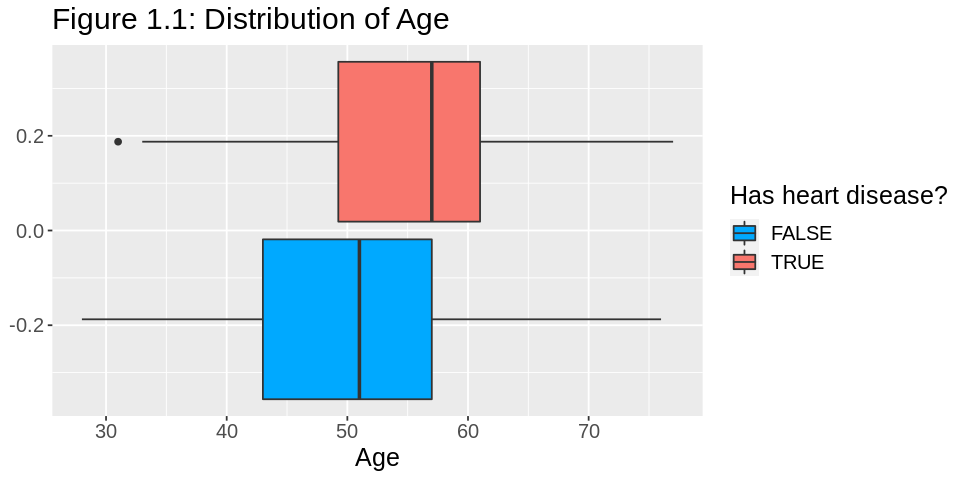

Using num as id variables



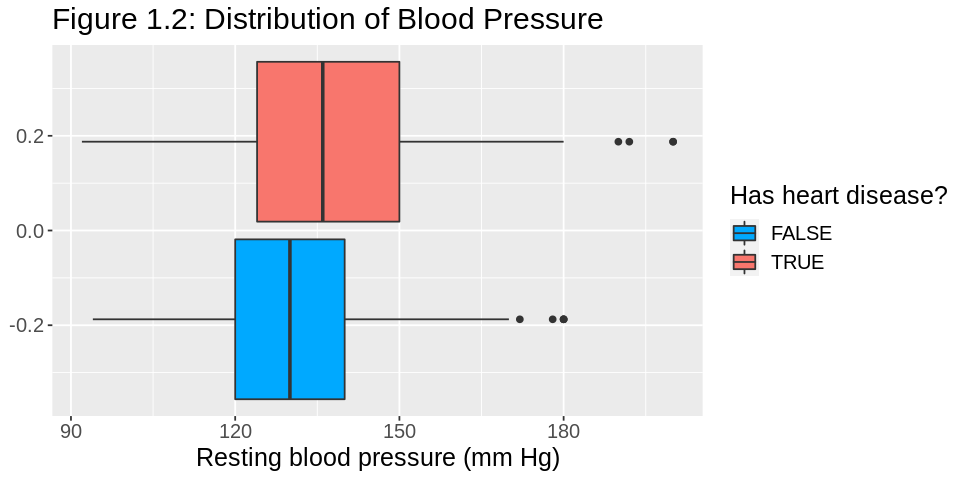

Using num as id variables



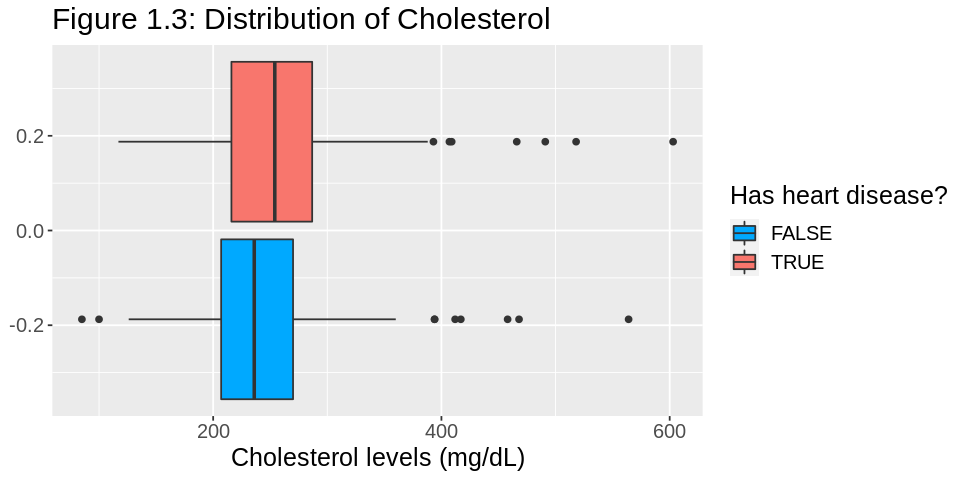

Using num as id variables



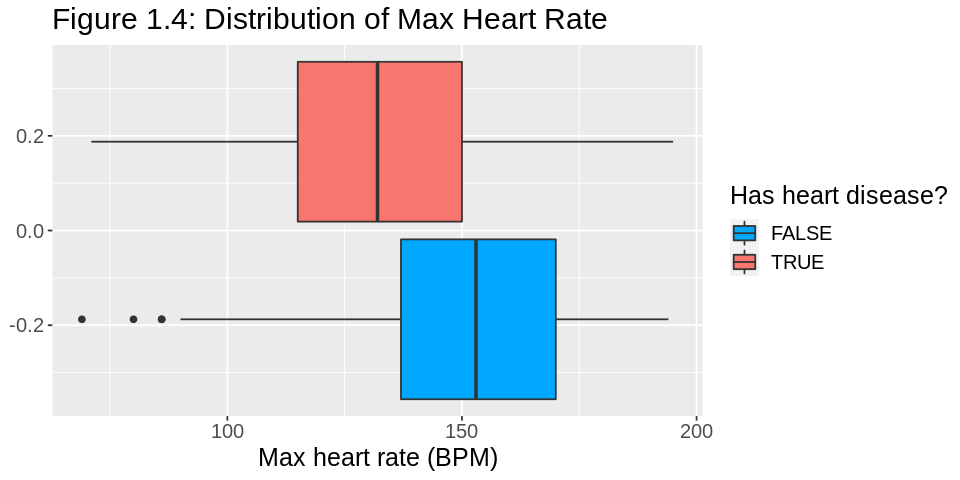

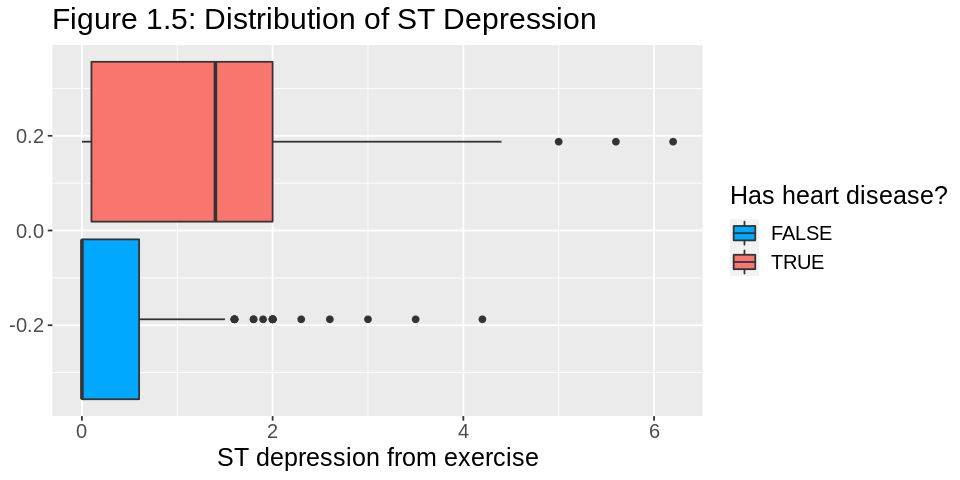

In [32]:
options(repr.plot.width = 8, repr.plot.height = 4)
# Distributions of predictor variables

age_dist <- heart_training |>
    melt()|>
    filter(variable=="age")|>
    ggplot(aes(x=value, fill=num))+
        geom_boxplot()+
        theme(text=element_text(size=15))+
        labs(x="Age", fill="Has heart disease?")+
        scale_fill_manual(values=c("#00A9FF","#F8766D"))+
        ggtitle("Figure 1.1: Distribution of Age")
age_dist

trest_dist <- heart_training |>
    melt()|>
    filter(variable=="trestbps")|>
    ggplot(aes(x=value, fill=num))+
        geom_boxplot()+
        theme(text=element_text(size=15))+
        labs(x="Resting blood pressure (mm Hg)", fill="Has heart disease?")+
        scale_fill_manual(values=c("#00A9FF","#F8766D"))+
        ggtitle("Figure 1.2: Distribution of Blood Pressure")
trest_dist

chol_dist <- heart_training |>
    melt()|>
    filter(variable=="chol")|>
    ggplot(aes(x=value, fill=num))+
        geom_boxplot()+
        theme(text=element_text(size=15))+
        labs(x="Cholesterol levels (mg/dL)", fill="Has heart disease?")+
        scale_fill_manual(values=c("#00A9FF","#F8766D"))+
        ggtitle("Figure 1.3: Distribution of Cholesterol")
chol_dist

thalach_dist <- heart_training |>
    melt()|>
    filter(variable=="thalach")|>
    ggplot(aes(x=value, fill=num))+
        geom_boxplot()+
        theme(text=element_text(size=15))+
        labs(x="Max heart rate (BPM)", fill="Has heart disease?")+
        scale_fill_manual(values=c("#00A9FF","#F8766D"))+
        ggtitle("Figure 1.4: Distribution of Max Heart Rate")
thalach_dist

oldpeak_dist <- heart_training |>
    melt()|>
    filter(variable=="oldpeak")|>
    ggplot(aes(x=value, fill=num))+
        geom_boxplot()+
        theme(text=element_text(size=15))+
        labs(x="ST depression from exercise", fill="Has heart disease?")+
        scale_fill_manual(values=c("#00A9FF","#F8766D"))+
        ggtitle("Figure 1.5: Distribution of ST Depression")
oldpeak_dist

From the average tables and boxplots, we conclude that patients with heart disease tend to be older, have lower maximum heart rates, and have higher ST depression. On the other hand, cholesterol and resting blood pressure do not seem particularly good predictors for heart disease since the distributions between patients diagnosed and not diagnosed with heart disease are about the same, so we will not use them.

## Methods 

We will answer our question by creating a classification model using K-nearest neighbors. We are using age, maximum heart rate (thalach) and ST depression (oldpeak) as our predictors for our model. ST depression is a particular outcome that could be shown in an individual’s ECG (electrocardiogram). This occurs when the ‘ST’ segment in a patient’s results appears irregularly low and sits below the baseline (Rowden, 2022). After our preliminary data analysis we created distribution graphs of each of our possible predictor variables (figures 1.1-1.5) and an average values table of all possible predictors (table 5.2) to determine which ones would be best for our model. From these visualizations, we found that these three variables, age, maximum heart rate, and ST depression have the best correlation with the presence of heart disease. 

# Classification and Results

First, we preform a 5-fold cross validation with K values ranging from 1 to 50. We chose a 5-fold cross validation because it gave us a generally good estimate within a reasonable timeframe. We chose a K range of 1 to 50 as that also gives us a broad range of K values while running within a reasonable timeframe.

In [33]:
set.seed(1000)
heart_vfold <- vfold_cv(heart_training, v = 5, strata = num)
gridvals <- tibble(neighbors = seq(1, 50))

heart_recipe <- recipe(num ~ age + thalach + oldpeak, data = heart_training) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("classification")

knn_results <- workflow() |>
    add_model(knn_spec) |>
    add_recipe(heart_recipe) |>
    tune_grid(resamples = heart_vfold, grid = gridvals) |>
    collect_metrics() |>
    filter(.metric == "accuracy")

cat("\n\nTable 6.1: Tuning Grid for K")
knn_results



Table 6.1: Tuning Grid for K

neighbors,.metric,.estimator,mean,n,std_err,.config
<int>,<chr>,<chr>,<dbl>,<int>,<dbl>,<chr>
1,accuracy,binary,0.6798812,5,0.016266980,Preprocessor1_Model01
2,accuracy,binary,0.6779208,5,0.014256532,Preprocessor1_Model02
3,accuracy,binary,0.7176634,5,0.007014039,Preprocessor1_Model03
⋮,⋮,⋮,⋮,⋮,⋮,⋮
48,accuracy,binary,0.7315050,5,0.01274594,Preprocessor1_Model48
49,accuracy,binary,0.7275446,5,0.01210047,Preprocessor1_Model49
50,accuracy,binary,0.7275446,5,0.01210047,Preprocessor1_Model50


Then, we plot a graph of all the K values.

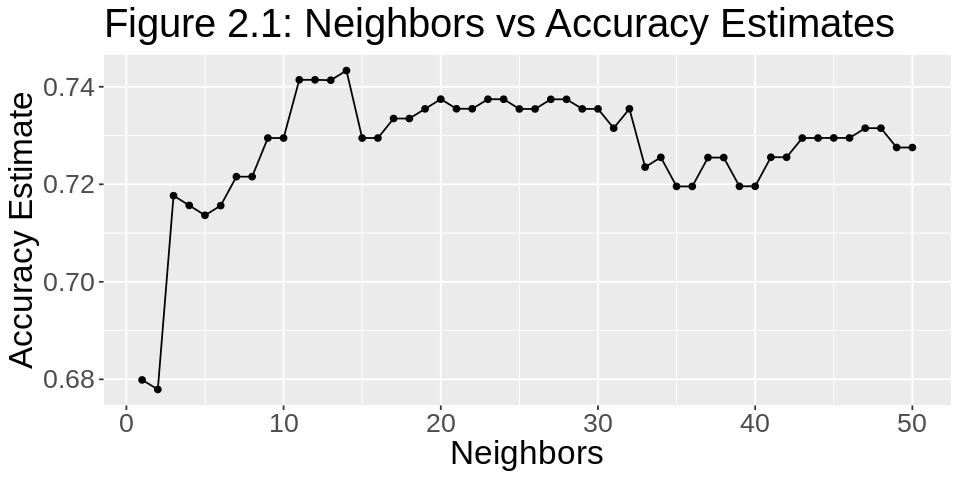

In [34]:
cross_val_plot <- ggplot(knn_results, aes(x = neighbors, y = mean)) +
    geom_point() +
    geom_line() +
    labs(x = "Neighbors", y = "Accuracy Estimate") +
    theme(text = element_text(size = 20)) +
    ggtitle("Figure 2.1: Neighbors vs Accuracy Estimates")

cross_val_plot

Looking at the plot above, we see a distinct peak at 12 neighbors. We chose this value as our K value for prediction as there is a noticeable peak from 11 to 14. Therefore, we chose the value in the middle since it should provide a more consistent accuracy. Also, the k values around it do not have a drastic drop in accuracy, meaning that 12 neighbors should be a reliable value to choose.

We also chose 12 because it is neither too large or too small, which reduces the chances of overfitting or underfitting.

Below, we proceed with making our k-nn model using 12 neighbors. We then test our model using the testing data, and we find that our model has an accuracy of about 73%. We also find the confusion matrix to see the distribution of true and false positives and negatives, which we later interpret in the analysis.

In [19]:
knn_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = 12) |>
    set_engine("kknn") |>
    set_mode("classification")

heart_fit <- workflow() |>
    add_model(knn_spec) |> 
    add_recipe(heart_recipe) |>
    fit(heart_training)

heart_predictions <- predict(heart_fit, heart_testing) |>
    bind_cols(heart_testing)

heart_acc <- heart_predictions |>
    metrics(truth = num, estimate = .pred_class) |>
    filter(.metric == "accuracy") |>
    select(.estimate) |>
    pull()

cat("\n\nPrediction Accuracy:")
heart_acc

heart_cm <- heart_predictions |>
    conf_mat(truth = num, estimate = .pred_class)
cat("\n\nTable 7.1: Confusion Matrix for Prediction")
heart_cm



Prediction Accuracy:

[1] 0.7278107



Table 7.1: Confusion Matrix for Prediction

          Truth
Prediction FALSE TRUE
     FALSE    72   29
     TRUE     17   51

Below, we plot each of the three selector variables against each other (i.e. Maximum heart rate vs. age, ST depression vs. Maximum heart rate, and Age vs. ST depression) and see the predicted class for each point in the testing data, resulting in three plots. We do this to check for multicollinearity in our model and to see if we chose our predictor variables for the actual testing data. 

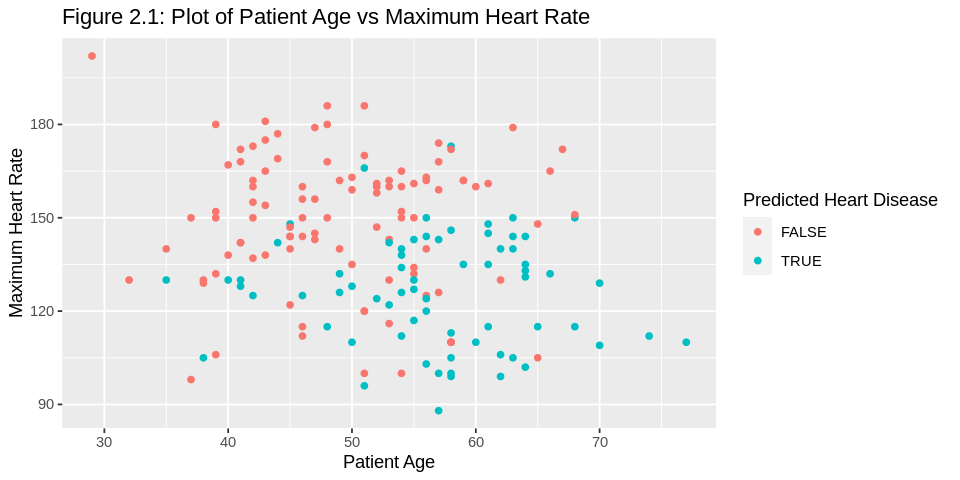

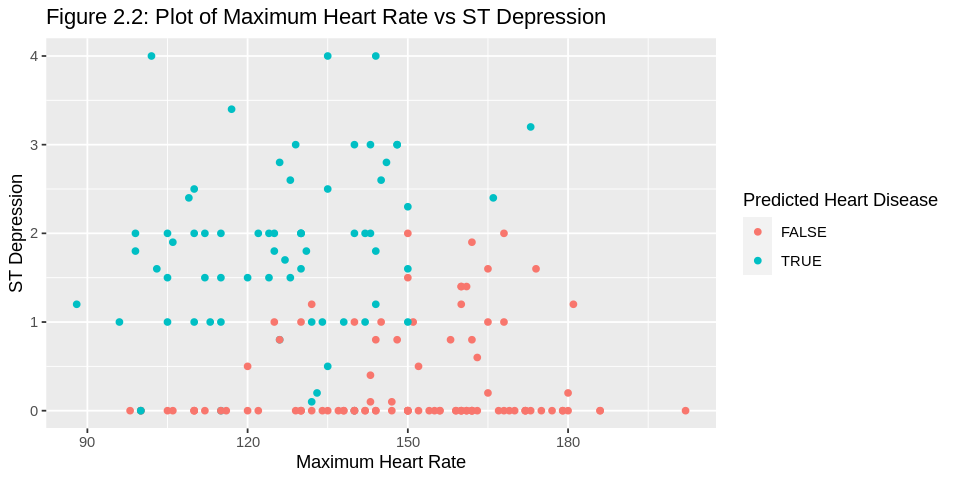

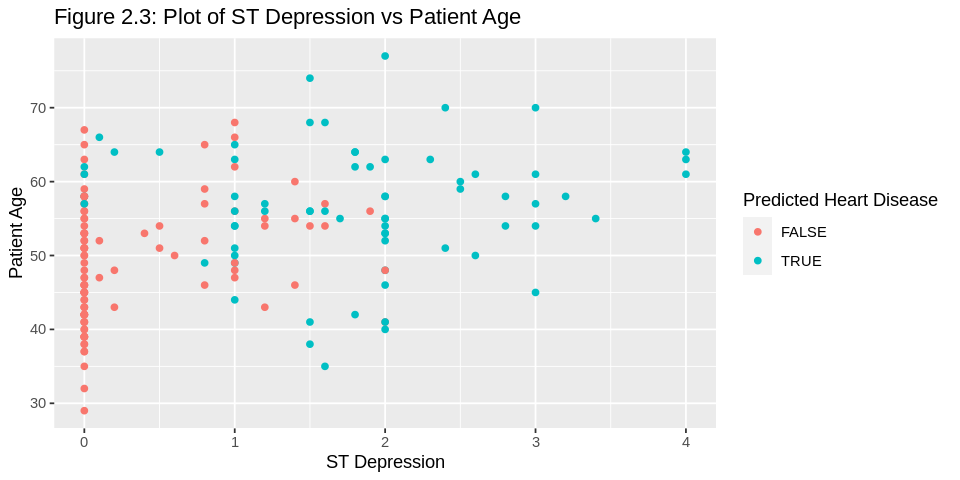

In [20]:
age_thalach_plot <- heart_predictions |> 
    ggplot(aes(x = age, y = thalach, color = .pred_class)) +
    geom_point() + 
    labs(x = "Patient Age", y = "Maximum Heart Rate", color = "Predicted Heart Disease", fill = "Contour Prediction") +
    labs(title = "Figure 2.1: Plot of Patient Age vs Maximum Heart Rate")

age_thalach_plot

thalach_oldpeak_plot <- heart_predictions |>
    ggplot(aes(x = thalach, y = oldpeak, color = .pred_class)) +
    geom_point() + 
    labs(x = "Maximum Heart Rate", y = "ST Depression", color = "Predicted Heart Disease", fill = "Contour Prediction") +
    labs(title = "Figure 2.2: Plot of Maximum Heart Rate vs ST Depression")

thalach_oldpeak_plot

oldpeak_age_plot <- heart_predictions |> 
    ggplot(aes(x = oldpeak, y = age, color = .pred_class)) +
    geom_point() + 
    labs(x = "ST Depression", y = "Patient Age", color = "Predicted Heart Disease", fill = "Contour Prediction") +
    labs(title = "Figure 2.3: Plot of ST Depression vs Patient Age")

oldpeak_age_plot

In [22]:
grid <- expand.grid(
  age = seq(min(heart_predictions$age), max(heart_predictions$age), 
            by = (max(heart_predictions$age) - min(heart_predictions$age))/25),
  thalach = seq(min(heart_predictions$thalach), max(heart_predictions$thalach), 
            by = (max(heart_predictions$thalach) - min(heart_predictions$thalach))/25),
  oldpeak = seq(min(heart_predictions$oldpeak), max(heart_predictions$oldpeak),
            by = (max(heart_predictions$oldpeak) - min(heart_predictions$oldpeak))/25)
)

grid_predictions <- predict(heart_fit, grid) |>
    bind_cols(grid)

In [23]:
grid_pred.age_thalach <- grid_predictions |>
    group_by(age, thalach) |>
    summarize(grid_pred = mean(as.integer(.pred_class)))

grid_pred.thalach_oldpeak <- grid_predictions |>
    group_by(thalach, oldpeak) |>
    summarize(grid_pred = mean(as.integer(.pred_class)))

grid_pred.oldpeak_age <- grid_predictions |>
    group_by(oldpeak, age) |>
    summarize(grid_pred = mean(as.integer(.pred_class)))

`summarise()` has grouped output by 'age'. You can override using the `.groups`
argument.
`summarise()` has grouped output by 'thalach'. You can override using the
`.groups` argument.
`summarise()` has grouped output by 'oldpeak'. You can override using the
`.groups` argument.


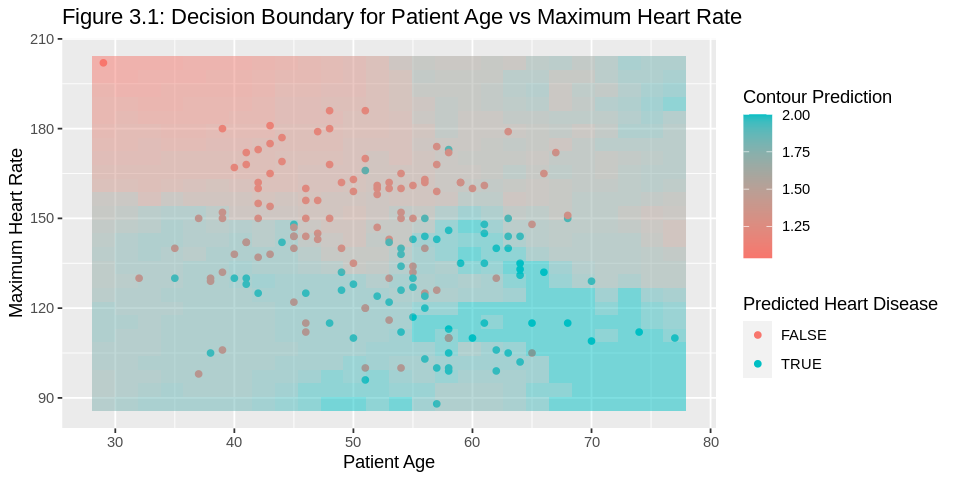

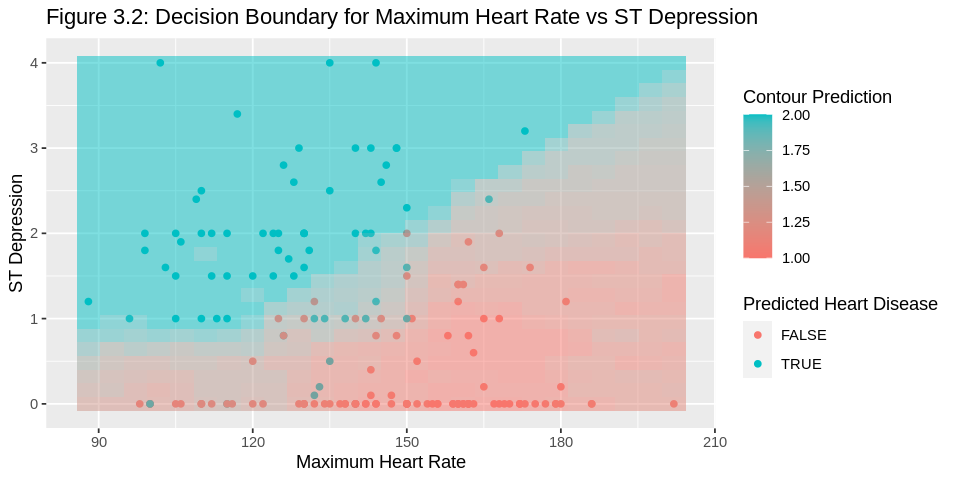

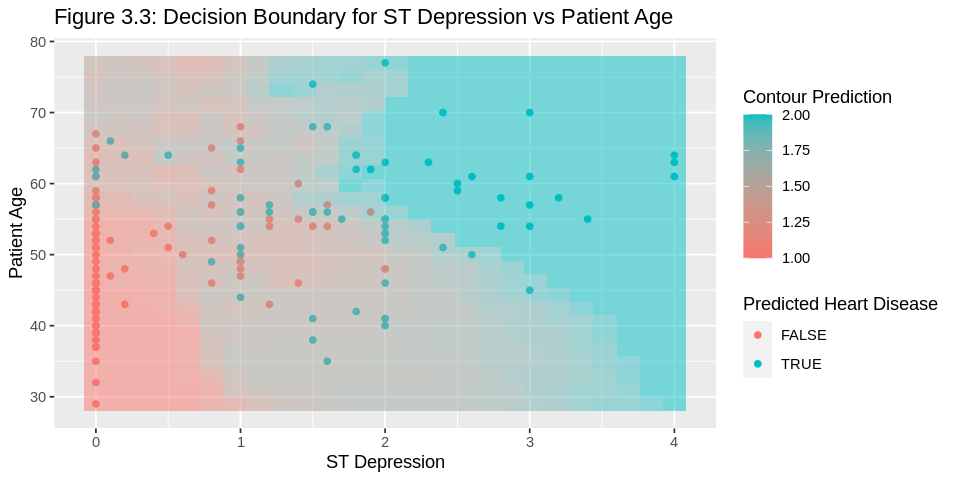

In [36]:
age_thalach_plot <- ggplot() +
    geom_point(data = heart_predictions, aes(x = age, y = thalach, color = .pred_class)) + 
    geom_tile(data = grid_pred.age_thalach, aes(x = age, y = thalach, fill = grid_pred), alpha = .5) + 
    scale_fill_gradient(low = "#f8766d", high = "#00bfc4") +
    labs(x = "Patient Age", y = "Maximum Heart Rate", color = "Predicted Heart Disease", fill = "Contour Prediction") +
    labs(title = "Figure 3.1: Decision Boundary for Patient Age vs Maximum Heart Rate")

age_thalach_plot

thalach_oldpeak_plot <- ggplot() +
    geom_point(data = heart_predictions, aes(x = thalach, y = oldpeak, color = .pred_class)) + 
    geom_tile(data = grid_pred.thalach_oldpeak, aes(x = thalach, y = oldpeak, fill = grid_pred), alpha = .5) + 
    scale_fill_gradient(low = "#f8766d", high = "#00bfc4") +
    labs(x = "Maximum Heart Rate", y = "ST Depression", color = "Predicted Heart Disease", fill = "Contour Prediction") +
    labs(title = "Figure 3.2: Decision Boundary for Maximum Heart Rate vs ST Depression")

thalach_oldpeak_plot

oldpeak_age_plot <- ggplot() +
    geom_point(data = heart_predictions, aes(x = oldpeak, y = age, color = .pred_class)) + 
    geom_tile(data = grid_pred.oldpeak_age, aes(x = oldpeak, y = age, fill = grid_pred), alpha = .5) + 
    scale_fill_gradient(low = "#f8766d", high = "#00bfc4") +
    labs(x = "ST Depression", y = "Patient Age", color = "Predicted Heart Disease", fill = "Contour Prediction") +
    labs(title = "Figure 3.3: Decision Boundary for ST Depression vs Patient Age")

oldpeak_age_plot

# Temporary code for now in case we need to revert

# age_thalach_plot <- heart_predictions |>
#     ggplot(aes(x = age, y = thalach, color = .pred_class)) +
#     geom_point() + 
#     labs(x = "Patient Age", y = "Maximum Heart Rate", color = "Predicted Heart Disease")

# ggplot(grid_predictions_age_thalach, aes(x = age, y = thalach, fill = pred)) +
#   geom_tile() +
#   labs(title = "Decision Boundary for Logistic Regression Model")

# age_thalach_plot

# Discussion

## Sources 

Bobbio, M., Fubini, A., Detrano, R., Shandling, A. H., Ellestad, M. H., Clark, J., Brezden, O., Abecia, A., & Martinez-caro, D. (1994). Diagnostic accuracy of predicting coronary artery disease related to patients' characteristics. Journal of Clinical Epidemiology, 47(4), 389–395. https://doi.org/10.1016/0895-4356(94)90160-0 

Cherngs. (2020, March 29). *Heart disease Cleveland UCI.* Kaggle. Retrieved from https://www.kaggle.com/datasets/cherngs/heart-disease-cleveland-uci 

Deshmukh, H. (2020, June 18). *Heart disease UCI-Diagnosis &amp; Prediction - Towards Data Science.* Towards Data Science. Retrieved from https://towardsdatascience.com/heart-disease-uci-diagnosis-prediction-b1943ee835a7 

Detrano, R., Janosi, A., Pfistere, M., & Steinbrunn, W. (1988). *Heart Disease Data Set.* UCI Machine Learning Repository. Retrieved from https://archive.ics.uci.edu/ml/datasets/Heart+Disease

Rowden, A. (2022, July 28). ST depression on ECG: What it means and causes. Medical News Today. Retrieved from https://www.medicalnewstoday.com/articles/st-depression-on-ecg 

World Health Organization. (2021, June 11). *Cardiovascular diseases (cvds).* World Health Organization. Retrieved from https://www.who.int/news-room/fact-sheets/detail/cardiovascular-diseases-(cvds) 